# Introducing Keras
> In this first chapter, you will get introduced to neural networks, understand what kind of problems they can solve, and when to use them. You will also build several networks and save the earth by training a regression model that approximates the orbit of a meteor that is approaching us! This is the Summary of lecture "Introduction to Deep Learning with Keras", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Deep_Learning]
- image: 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## What is Keras?
- Keras + Tensorflow
    - Tensorflow's high level framework of choice
    - Keras is complementary to Tensorflow
- Feature Engineering
![fe](image/fe.png)



## Your first neural network
- Neural Network
![nn](image/simple_nn.png)


### Hello nets!
You're going to build a simple neural network to get a feeling of how quickly it is to accomplish this in Keras.

You will build a network that takes two numbers as an input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.

A non-constrained output can be obtained by avoiding setting an activation function in the output layer. This is useful for problems like regression, when we want our output to be able to take any non-constrained value.
![net](image/hello_nets.png)

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2, ), activation='relu'))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarize your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Surviving a meteor strike
- Scientific prediction
![meteor](image/meteor.png)

### Specifying a model
You will build a simple regression model to predict the orbit of the meteor!

Your training data consist of measurements taken at time steps from -10 minutes before the impact region to +10 minutes after. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor orbit at that time step.

Note that you can view this problem as approximating a quadratic function via the use of neural networks.
![meteor2](image/meteor_orbit_3.jpg)
This data is stored in two numpy arrays: one called `time_steps` , what we call features, and another called `y_positions`, with the labels. Go on and build your model! It should be able to predict the y positions for the meteor orbit at future time steps.

In [7]:
orbit = pd.read_csv('./dataset/orbit.csv')
orbit.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [8]:
time_steps = orbit['time_steps'].to_numpy()
y_positions = orbit['y'].to_numpy()

In [9]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1, ), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

### Training
You're going to train your first model in this course, and for a good cause!

Remember that before training your Keras models you need to compile them. This can be done with the `.compile()` method. The `.compile()` method takes arguments such as the `optimizer`, used for weight updating, and the `loss` function, which is what we want to minimize. Training your model is as easy as calling the `.fit()` method, passing on the features, labels and a number of epochs to train for.
 Train it and evaluate it on this very same data, let's see if your model can learn the meteor's trajectory.

In [10]:
# Compile your model
model.compile(optimizer='adam', loss='mse')

print('Training started..., this can take a while:')

# Fit your model on your data for 30 epochs
model.fit(time_steps, y_positions, epochs=30)

# Evaluate your model
print("Final loss value:", model.evaluate(time_steps, y_positions))

Training started..., this can take a while:
Epoch 1/30
63/63 [==============================] - 0s 1ms/step - loss: 1466.8392
Epoch 2/30
63/63 [==============================] - 0s 1ms/step - loss: 224.4952
Epoch 3/30
63/63 [==============================] - 0s 1ms/step - loss: 139.0037
Epoch 4/30
63/63 [==============================] - 0s 1ms/step - loss: 120.6324
Epoch 5/30
63/63 [==============================] - 0s 1ms/step - loss: 100.1729
Epoch 6/30
63/63 [==============================] - 0s 1ms/step - loss: 77.3846
Epoch 7/30
63/63 [==============================] - 0s 1ms/step - loss: 53.5575
Epoch 8/30
63/63 [==============================] - 0s 1ms/step - loss: 33.8326
Epoch 9/30
63/63 [==============================] - 0s 1ms/step - loss: 20.0874
Epoch 10/30
63/63 [==============================] - 0s 1ms/step - loss: 10.9600
Epoch 11/30
63/63 [==============================] - 0s 1ms/step - loss: 6.7007
Epoch 12/30
63/63 [==============================] - 0s 1ms/step - lo

### Predicting the orbit!
You've already trained a `model` that approximates the orbit of the meteor approaching Earth and it's loaded for you to use.

Since you trained your model for values between -10 and 10 minutes, your model hasn't yet seen any other values for different time steps. You will now visualize how your model behaves on unseen data.

Hurry up, the Earth is running out of time!

Remember `np.arange(x,y)` produces a range of values from `x` to `y-1`. That is the `[x, y)` interval.

In [14]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

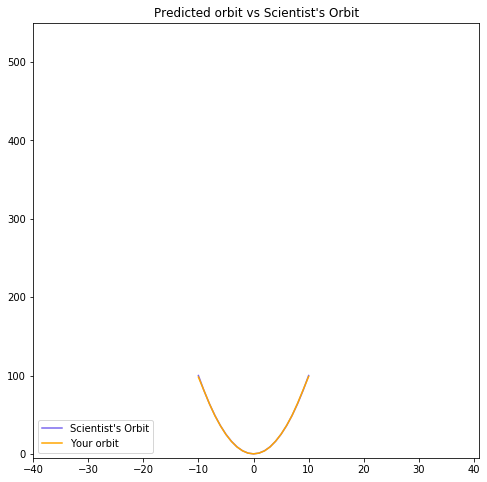

In [15]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))

# Plot the twenty minute orbit
plot_orbit(twenty_min_orbit)

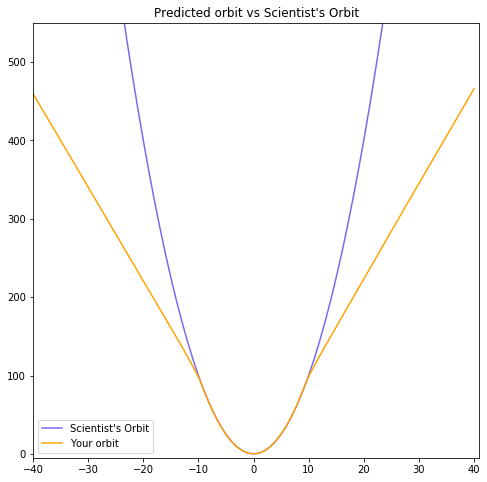

In [16]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

Your model fits perfectly to the scientists trajectory for time values between -10 to +10, the region where the meteor crosses the impact region, so we won't be hit! However, it starts to diverge when predicting for new values we haven't trained for. This shows neural networks learn according to the data they are fed with. Data quality and diversity are very important.